In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.collections import PolyCollection
import random
import numpy as np
import pandas as pd
import os
from scipy.integrate import odeint


## BistablePlots

In [10]:
def polygon_under_graph(xlist, ylist):
    """
    Construct the vertex list which defines the polygon filling the space under
    the (xlist, ylist) line graph.  Assumes the xs are in ascending order.
    """
    return [(xlist[0], 0.), *zip(xlist, ylist), (xlist[-1], 0.)]


In [8]:
main_path  = os.getcwd()
datafolder_path = main_path+"/data_gardner/"

In [9]:
data_dfs = []
for filename in os.listdir(datafolder_path):
    if filename.endswith(".dat") and filename[0].isdigit():
        data_dfs.append([float(filename.split(".dat")[0]),pd.read_csv(datafolder_path+filename,header=None)])

        
def sortSecond(val): 
    return val[0] 
        
data_dfs.sort(key =sortSecond )  #sort by increasing c3



In [10]:
#plt.matshow(data_dfs[-1][1])

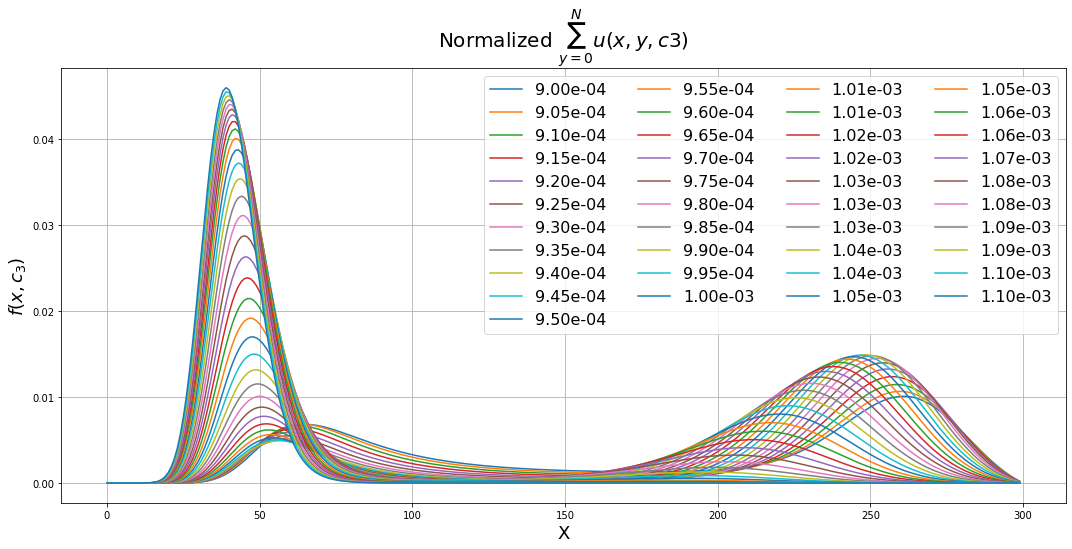

In [11]:
plt.figure(figsize=[18,8])
for i in range(0,len(data_dfs)):
    plt.plot(data_dfs[i][1].sum(axis=0)/sum(data_dfs[i][1].sum(axis=0)),label="%2.2e"%(data_dfs[i][0]))
plt.legend(fontsize=16,ncol=4)
plt.xlabel("X",fontsize=18)
plt.ylabel("$f(x,c_{3})$",fontsize=18)
plt.title("Normalized $\sum^{N}_{y=0}u(x,y,c3)$",fontsize=20)
plt.grid(True)

In [12]:
X = np.linspace(1,300,300)
zeros = np.full(300,0)
Y = []
Z = []
for i in range(0,len(data_dfs)):
    Y.append(np.full(300,data_dfs[i][0]))
    Z.append(data_dfs[i][1].sum(axis=0)/sum(data_dfs[i][1].sum(axis=0)))


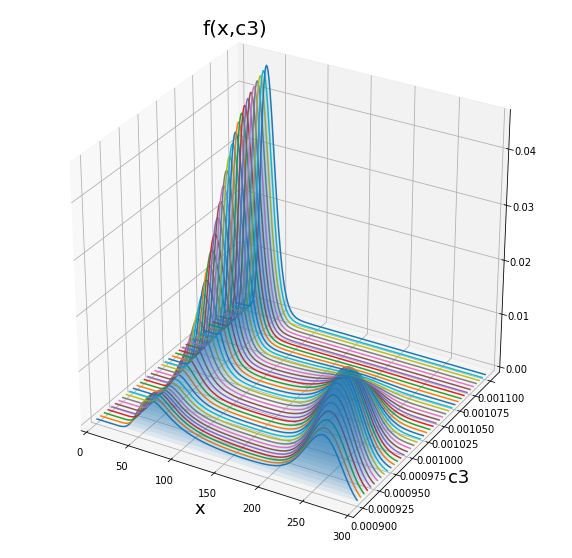

In [13]:
plt.figure(figsize=(10,10))
ax = plt.subplot(projection='3d')
Zmax = 0

for i in range(0,len(data_dfs)):
    verts=[]
    verts.append(polygon_under_graph(X, Z[i]))

    poly = PolyCollection(verts, alpha=.1)
    ax.add_collection3d(poly, zs=data_dfs[i][0], zdir='y')
    #ax.plot(X, Y[i], Z[i],c=_colors[i])
    ax.plot(X, Y[i], Z[i])

    if max(Z[i])>Zmax:
        Zmax=max(Z[i])
    
    ax.set_xlabel('x',fontsize=18)
    ax.set_ylabel('c3',fontsize=18)
    
    
ax.text2D(0.35, 0.95, 'f(x,c3)',fontsize=20, transform=ax.transAxes)

ax.set_xlim(0,300)
ax.set_ylim(data_dfs[0][0]*.99,data_dfs[-1][0]*1.01)
ax.set_zlim(0,Zmax)
ax.dist = 10
ax.yaxis.labelpad=10




In [15]:

_z = []
_xlabels = []
_xticks = []
for i in range(0,len(data_dfs)):
    _z.append(data_dfs[i][1].sum(axis=0)/sum(data_dfs[i][1].sum(axis=0)))

for i in range(0,len(data_dfs)):
    _xlabels.append("%.2e"%(data_dfs[i][0]))
    _xticks.append(i)

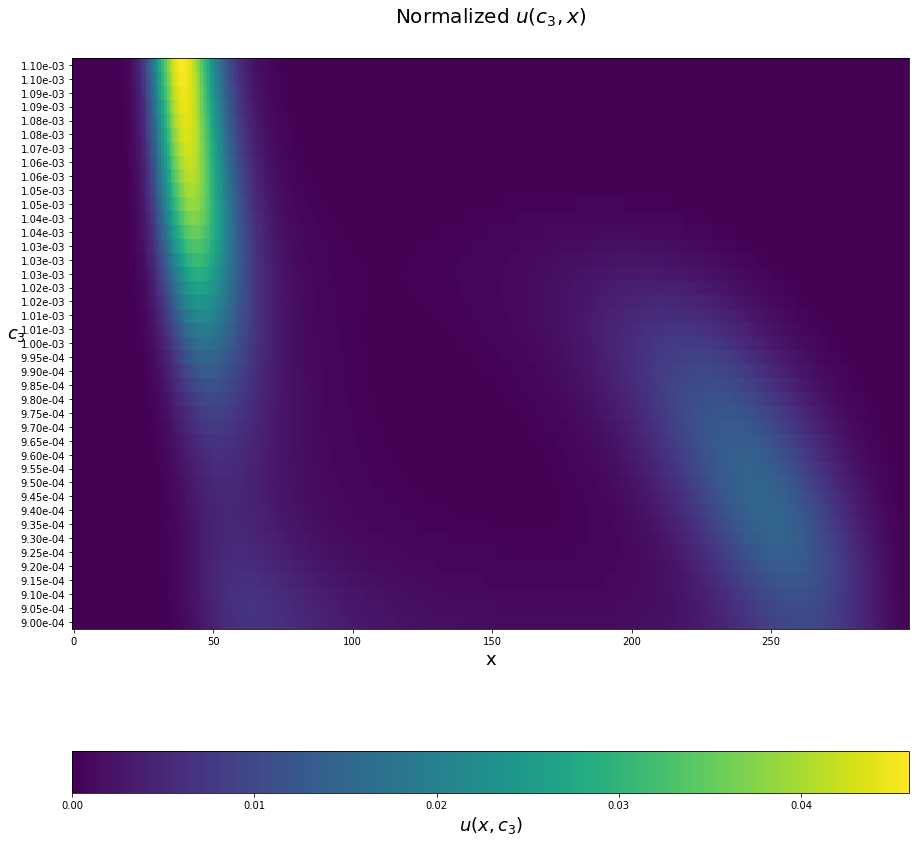

In [16]:
fig, ax = plt.subplots(figsize=(15,15))
im = ax.matshow((_z),origin='lower',aspect='auto')
ax.set_yticks(_xticks)
ax.set_yticklabels(_xlabels,rotation=0)
ax.xaxis.set_ticks_position('bottom')
ax.set_title("Normalized $u(c_{3},x)$",fontsize=20)
ax.set_ylabel("$c_{3}$",fontsize=18,rotation=0)
ax.set_xlabel("x",fontsize=18)
cbar = plt.colorbar(im,orientation='horizontal')
cbar.set_label('$u(x,c_{3})$', rotation=0,fontsize=18)


In [17]:
c3s = []
for i in range(0,len(data_dfs)):
    c3s.append(data_dfs[i][0])

## ODS vs CME

In [18]:
ODE_sol = pd.read_csv(main_path+"/ode_sol.csv",header=None)
ODE_sol.head()

,0,1,2
0,0.000900,272.30110,35.232820
1,0.000905,269.96270,35.765434
2,0.000910,267.62476,36.309498
3,0.000915,265.28592,36.865623
4,0.000920,262.94495,37.434467


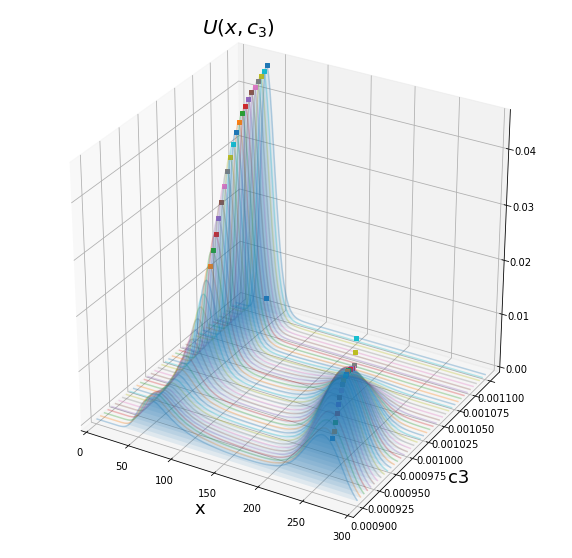

In [19]:
X = np.linspace(1,300,300)
zeros = np.full(300,0)
Y = []
Z = []
for i in range(0,len(data_dfs)):
    Y.append(np.full(300,data_dfs[i][0]))
    Z.append(data_dfs[i][1].sum(axis=0)/sum(data_dfs[i][1].sum(axis=0)))

    
    
    
    
plt.figure(figsize=(10,10))
ax = plt.subplot(projection='3d')
Zmax = 0

for i in range(0,len(data_dfs)):
    verts=[]
    verts.append(polygon_under_graph(X, Z[i]))

    poly = PolyCollection(verts, alpha=.1)
    ax.add_collection3d(poly, zs=data_dfs[i][0], zdir='y')
    ax.plot(X, Y[i], Z[i],alpha=.3)
    ax.scatter(ODE_sol[1].iloc[i], ODE_sol[0].iloc[i],max(Z[i]),marker='s')


    if max(Z[i])>Zmax:
        Zmax=max(Z[i])
    
    ax.set_xlabel('x',fontsize=18)
    ax.set_ylabel('c3',fontsize=18)
    
    
ax.text2D(0.35, 0.95, '$U(x,c_{3})$',fontsize=20, transform=ax.transAxes)

ax.set_xlim(0,300)
ax.set_ylim(data_dfs[0][0]*.99,data_dfs[-1][0]*1.01)
ax.set_zlim(0,Zmax)
ax.dist = 10
ax.yaxis.labelpad=10
#ax.view_init(30, 110)




In [20]:

_z = []
_xlabels = []
_xticks = []
for i in range(0,len(data_dfs)):
    _z.append(data_dfs[i][1].sum(axis=0)/sum(data_dfs[i][1].sum(axis=0)))

for i in range(0,len(data_dfs)):
    _xlabels.append("%.2e"%(data_dfs[i][0]))
    _xticks.append(i)

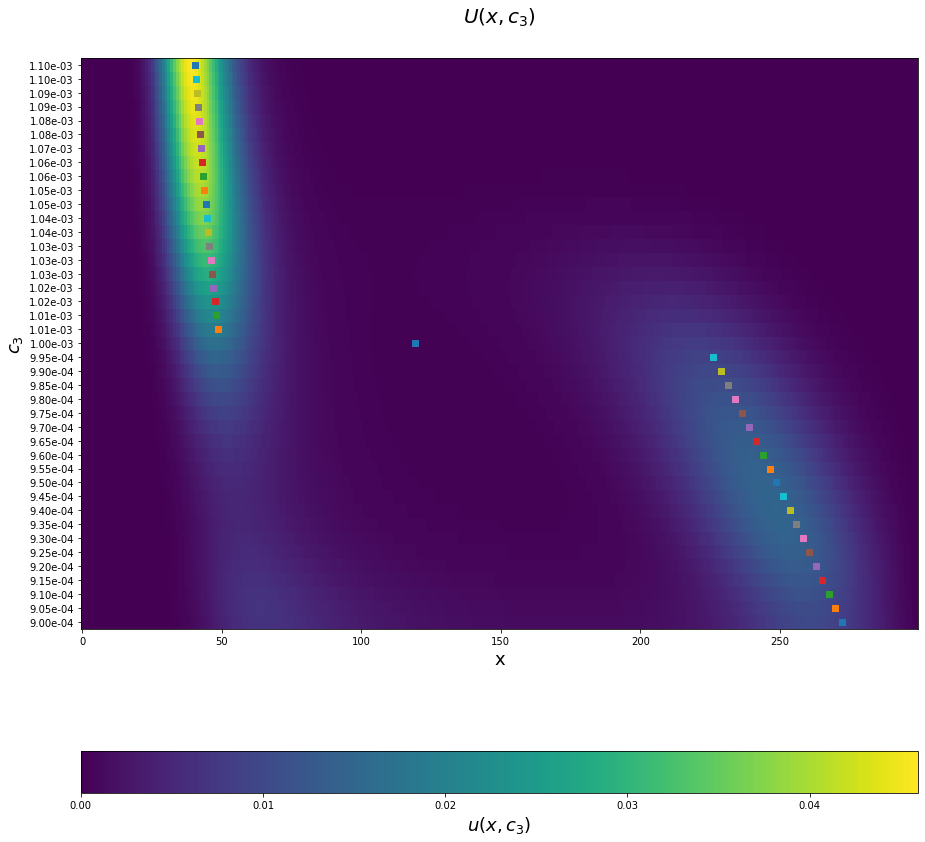

In [72]:
fig, ax = plt.subplots(figsize=(15,15))
im = ax.matshow((_z),origin='lower',aspect='auto')
ax.set_yticks(_xticks)
ax.set_yticklabels(_xlabels,rotation=0)
ax.xaxis.set_ticks_position('bottom')
ax.set_title("$U(x,c_{3})$",fontsize=20)
ax.set_ylabel("$c_{3}$",fontsize=18,rotation=90)
ax.set_xlabel("x",fontsize=18)
cbar = plt.colorbar(im,orientation='horizontal')
cbar.set_label('$u(x,c_{3})$', rotation=0,fontsize=18)
for i in range(0,len(data_dfs)):
    plt.scatter(ODE_sol[1].iloc[i],i,marker='s')

# SIR

In [27]:
main_path  = os.getcwd()
datafolder_path = main_path+"/data_sir/"

In [28]:
data_dfs = []
for filename in os.listdir(datafolder_path):
    if filename.endswith(".dat") and filename[0].isdigit():
        data_dfs.append([float(filename.split(".dat")[0]),pd.read_csv(datafolder_path+filename,header=None)])

        
def sortSecond(val): 
    return val[0] 
        
data_dfs.sort(key =sortSecond )  #sort by increasing c3



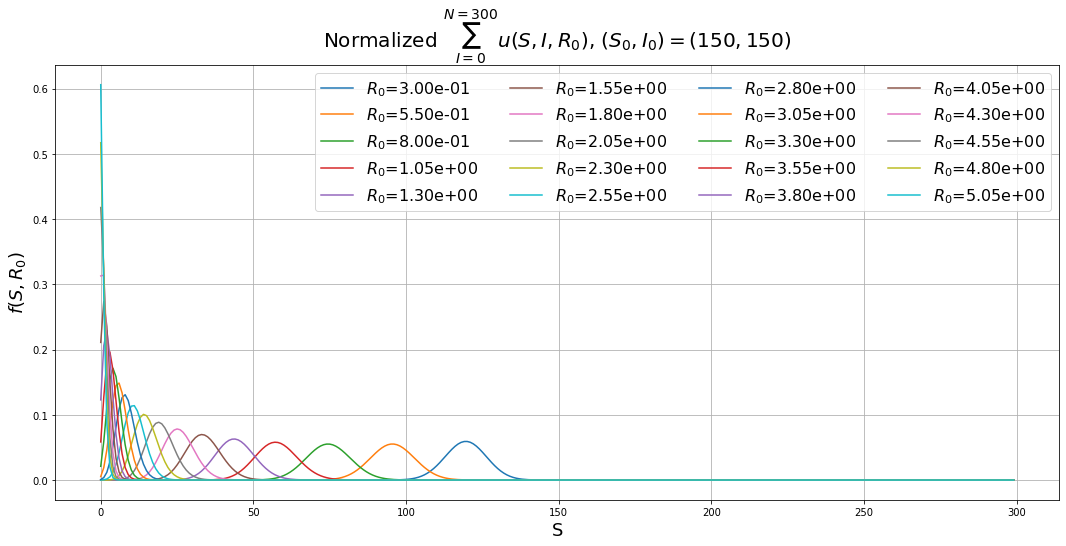

In [29]:
plt.figure(figsize=[18,8])
for i in range(0,len(data_dfs)):
    plt.plot(data_dfs[i][1].sum(axis=0)/sum(data_dfs[i][1].sum(axis=0)),label="$R_{0}$=%2.2e"%(data_dfs[i][0]))
plt.legend(fontsize=16,ncol=4)
plt.xlabel("S",fontsize=18)
plt.ylabel("$f(S,R_{0})$",fontsize=18)
plt.title("Normalized $\sum^{N=300}_{I=0}u(S,I,R_{0})$, $(S_{0},I_{0})=(150,150)$",fontsize=20)
plt.grid(True)

In [30]:
_z = []
_xlabels = []
_xticks = []
for i in range(0,len(data_dfs)):
    _z.append(data_dfs[i][1].sum(axis=0)/sum(data_dfs[i][1].sum(axis=0)))

for i in range(0,len(data_dfs)):
    _xlabels.append("%.2e"%(data_dfs[i][0]))
    _xticks.append(i)

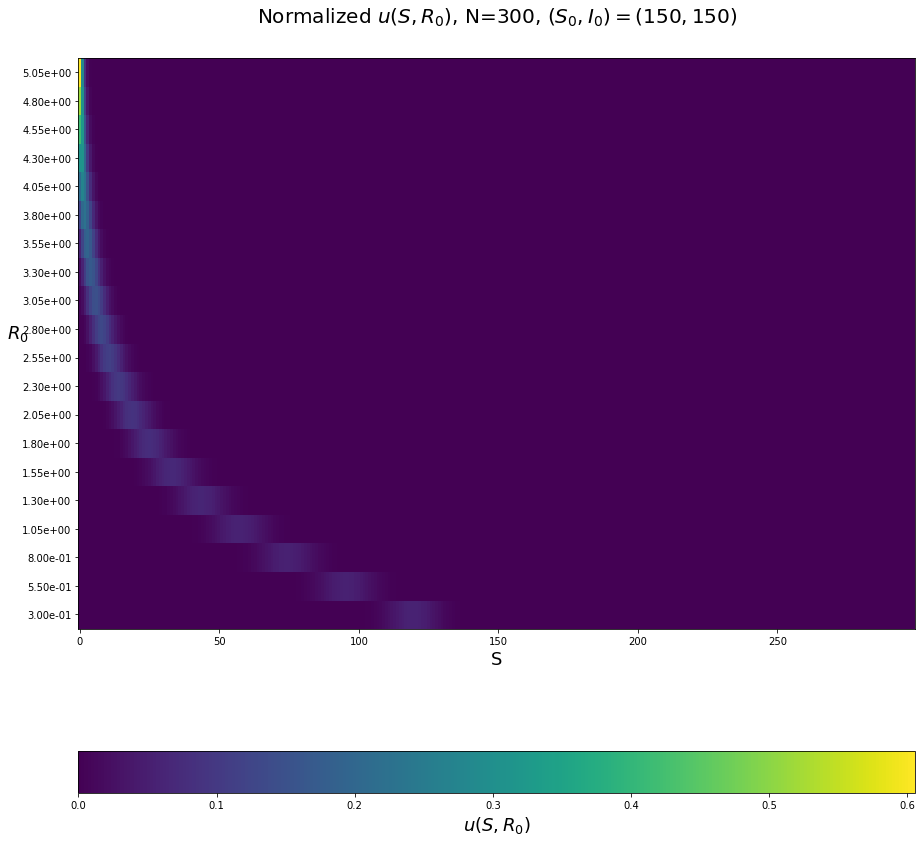

In [31]:
fig, ax = plt.subplots(figsize=(15,15))
im = ax.matshow((_z),origin='lower',aspect='auto')
ax.set_yticks(_xticks)
ax.set_yticklabels(_xlabels,rotation=0)
ax.xaxis.set_ticks_position('bottom')
ax.set_title("Normalized $u(S,R_{0})$, N=300, $(S_{0},I_{0})=(150,150)$",fontsize=20)
ax.set_ylabel("$R_{0}$",fontsize=18,rotation=0)
ax.set_xlabel("S",fontsize=18)
cbar = plt.colorbar(im,orientation='horizontal')
cbar.set_label('$u(S,R_{0})$', rotation=0,fontsize=18)


In [32]:
r0s = []
for i in range(0,len(data_dfs)):
    r0s.append(data_dfs[i][0])

In [34]:
len(r0s)

20

In [35]:
#ODE vs CME
ODE_sol = []
ODE_sol = pd.read_csv(datafolder_path+"/N=300_mu=[150.00,150.00]_analytical.dat",header=None)
ODE_sol.tail()


,0,1,2
15,4.05,2.710764,4.468575e-19
16,4.30,2.097399,3.210998e-19
17,4.55,1.624622,2.435453e-19
18,4.80,1.259593,1.933849e-19
19,5.05,0.977348,1.596078e-19


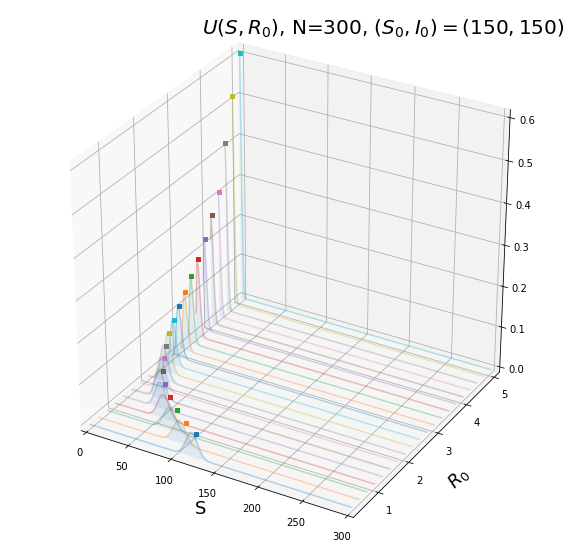

In [41]:
X = np.linspace(1,300,300)
zeros = np.full(300,0)
Y = []
Z = []
for i in range(0,len(data_dfs)):
    Y.append(np.full(300,data_dfs[i][0]))
    Z.append(data_dfs[i][1].sum(axis=0)/sum(data_dfs[i][1].sum(axis=0)))

    
    
    
    
plt.figure(figsize=(10,10))
ax = plt.subplot(projection='3d')
Zmax = 0

for i in range(0,len(data_dfs)):
    verts=[]
    verts.append(polygon_under_graph(X, Z[i]))

    poly = PolyCollection(verts, alpha=.1)
    ax.add_collection3d(poly, zs=data_dfs[i][0], zdir='y')
    ax.plot(X, Y[i], Z[i],alpha=.3)
    ax.scatter(ODE_sol[1].iloc[i], ODE_sol[0].iloc[i],max(Z[i]),marker='s')


    if max(Z[i])>Zmax:
        Zmax=max(Z[i])
    
    ax.set_xlabel('S',fontsize=18)
    ax.set_ylabel('$R_{0}$',fontsize=18)
    
    
ax.text2D(0.35, 0.95, '$U(S,R_{0})$, N=300, $(S_{0},I_{0})=(150,150)$',fontsize=20, transform=ax.transAxes)

ax.set_xlim(0,300)
ax.set_ylim(data_dfs[0][0]*.99,data_dfs[-1][0]*1.01)
ax.set_zlim(0,Zmax)
ax.dist = 10
ax.yaxis.labelpad=10
#ax.view_init(30, 110)




In [39]:
_z = []
_xlabels = []
_xticks = []
for i in range(0,len(data_dfs)):
    _z.append(data_dfs[i][1].sum(axis=0)/sum(data_dfs[i][1].sum(axis=0)))

for i in range(0,len(data_dfs)):
    _xlabels.append("%.2e"%(data_dfs[i][0]))
    _xticks.append(i)

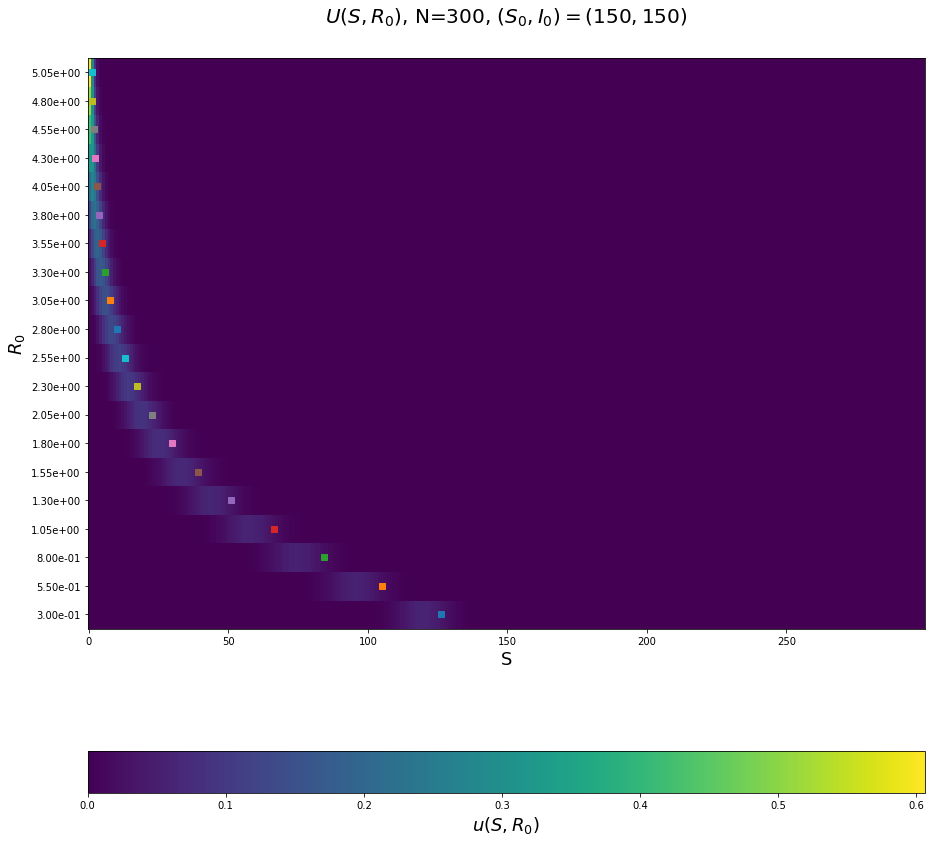

In [42]:
fig, ax = plt.subplots(figsize=(15,15))
im = ax.matshow((_z),origin='lower',aspect='auto')
ax.set_yticks(_xticks)
ax.set_yticklabels(_xlabels,rotation=0)
ax.xaxis.set_ticks_position('bottom')
ax.set_title("$U(S, R_{0})$, N=300, $(S_{0},I_{0})=(150,150)$",fontsize=20)
ax.set_ylabel("$R_{0}$",fontsize=18,rotation=90)
ax.set_xlabel("S",fontsize=18)
cbar = plt.colorbar(im,orientation='horizontal')
cbar.set_label('$u(S,R_{0})$', rotation=0,fontsize=18)
for i in range(0,len(data_dfs)):
    plt.scatter(ODE_sol[1].iloc[i],i,marker='s')